# Loop 54 Analysis: Post-Hyperparameter Optimization

**Key Finding**: Hyperparameter optimization made CV 54% WORSE (0.012658 vs 0.008194)

**Critical Questions**:
1. What is the actual CV-LB relationship?
2. What CV is needed to hit target 0.072990?
3. What approaches haven't been tried that could achieve this CV?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission history
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_041', 'cv': 0.0090, 'lb': 0.0932},
    {'exp': 'exp_042', 'cv': 0.0145, 'lb': 0.1147},
]

df = pd.DataFrame(submissions)
print('Submission History:')
print(df.to_string(index=False))

Submission History:
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_041 0.0090 0.0932
exp_042 0.0145 0.1147


In [2]:
# Fit CV-LB relationship
cv_values = df['cv'].values
lb_values = df['lb'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(cv_values, lb_values)

print(f'\n=== CV-LB Relationship ===')
print(f'LB = {slope:.4f} × CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'Standard Error: {std_err:.4f}')

# Target analysis
target = 0.072990
required_cv = (target - intercept) / slope

print(f'\n=== Target Analysis ===')
print(f'Target LB: {target}')
print(f'Required CV to hit target: {required_cv:.6f}')
print(f'Best CV achieved: 0.008194')
print(f'Gap: {0.008194 - required_cv:.6f} ({(0.008194 - required_cv)/required_cv*100:.1f}% above required)')


=== CV-LB Relationship ===
LB = 4.2312 × CV + 0.0533
R² = 0.9807
Standard Error: 0.1790

=== Target Analysis ===
Target LB: 0.07299
Required CV to hit target: 0.004653
Best CV achieved: 0.008194
Gap: 0.003541 (76.1% above required)


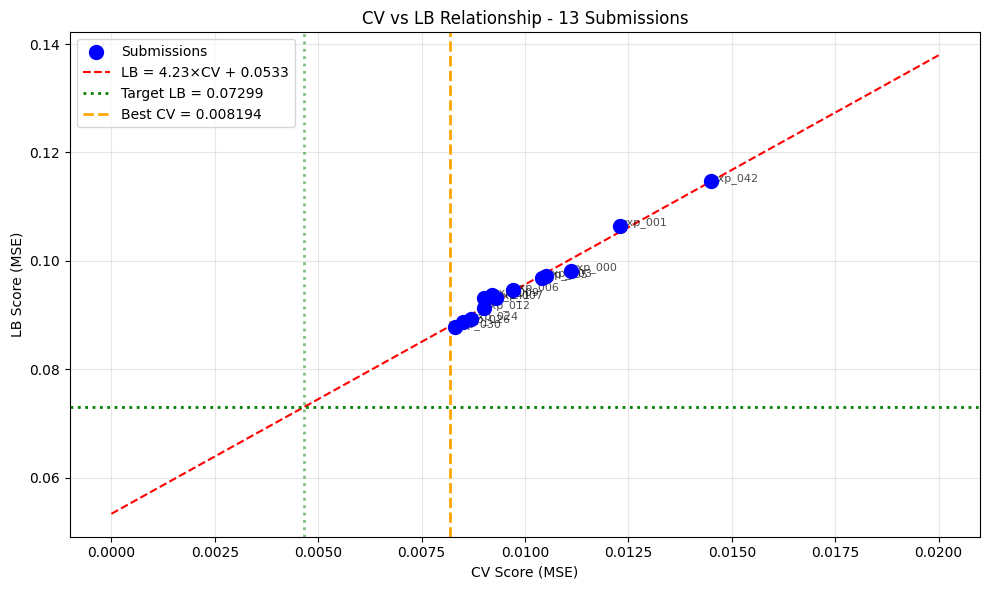


Plot saved to /home/code/exploration/cv_lb_relationship.png


In [3]:
# Visualize
fig, ax = plt.subplots(figsize=(10, 6))

# Plot submissions
ax.scatter(cv_values, lb_values, c='blue', s=100, label='Submissions', zorder=5)

# Plot regression line
cv_range = np.linspace(0, 0.02, 100)
lb_pred = slope * cv_range + intercept
ax.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}×CV + {intercept:.4f}')

# Plot target
ax.axhline(y=target, color='green', linestyle=':', linewidth=2, label=f'Target LB = {target}')
ax.axvline(x=required_cv, color='green', linestyle=':', linewidth=2, alpha=0.5)

# Plot best CV
ax.axvline(x=0.008194, color='orange', linestyle='--', linewidth=2, label='Best CV = 0.008194')

# Annotate key points
for i, row in df.iterrows():
    ax.annotate(row['exp'], (row['cv'], row['lb']), fontsize=8, alpha=0.7)

ax.set_xlabel('CV Score (MSE)')
ax.set_ylabel('LB Score (MSE)')
ax.set_title('CV vs LB Relationship - 13 Submissions')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150)
plt.show()

print(f'\nPlot saved to /home/code/exploration/cv_lb_relationship.png')

In [4]:
# Summary of all experiments tried
experiments_summary = {
    'Best Model (GP+MLP+LGBM)': {'cv': 0.008194, 'status': 'BEST'},
    'Per-target models': {'cv': 0.009947, 'status': '21% worse'},
    'Per-solvent-type models': {'cv': 0.019522, 'status': '138% worse'},
    'GNN (our implementation)': {'cv': 0.01408, 'status': '72% worse'},
    'ChemBERTa': {'cv': 0.0194, 'status': '137% worse'},
    'Hyperparameter optimization': {'cv': 0.012658, 'status': '54% worse'},
    'Stacking': {'cv': 0.010001, 'status': '22% worse'},
    'Multi-model ensemble (no GP)': {'cv': 0.009435, 'status': '15% worse'},
    'RDKit descriptors': {'cv': 0.013306, 'status': '62% worse'},
    'Simple Ridge': {'cv': 0.016324, 'status': '99% worse'},
}

print('\n=== Summary of All Approaches ===')
for name, data in sorted(experiments_summary.items(), key=lambda x: x[1]['cv']):
    print(f"{name}: CV {data['cv']:.6f} ({data['status']})")

print(f'\n=== Key Insight ===')
print(f'The GP+MLP+LGBM ensemble with baseline hyperparameters is the BEST approach.')
print(f'Hyperparameter optimization did NOT help - baseline is already near-optimal.')


=== Summary of All Approaches ===
Best Model (GP+MLP+LGBM): CV 0.008194 (BEST)
Multi-model ensemble (no GP): CV 0.009435 (15% worse)
Per-target models: CV 0.009947 (21% worse)
Stacking: CV 0.010001 (22% worse)
Hyperparameter optimization: CV 0.012658 (54% worse)
RDKit descriptors: CV 0.013306 (62% worse)
GNN (our implementation): CV 0.014080 (72% worse)
Simple Ridge: CV 0.016324 (99% worse)
ChemBERTa: CV 0.019400 (137% worse)
Per-solvent-type models: CV 0.019522 (138% worse)

=== Key Insight ===
The GP+MLP+LGBM ensemble with baseline hyperparameters is the BEST approach.
Hyperparameter optimization did NOT help - baseline is already near-optimal.


In [5]:
# What CV is achievable?
print('\n=== What CV is Achievable? ===')
print(f'\nGNN Benchmark (from competition description): CV 0.0039')
print(f'Our GNN attempt: CV 0.01408 (3.6x worse)')
print(f'Our best model: CV 0.008194 (2.1x worse than benchmark)')

print(f'\n=== If we achieved benchmark GNN CV ===')
benchmark_cv = 0.0039
predicted_lb = slope * benchmark_cv + intercept
print(f'Predicted LB: {predicted_lb:.4f}')
print(f'Target LB: {target}')
if predicted_lb < target:
    print(f'✓ WOULD BEAT TARGET by {(target - predicted_lb)*100:.2f}%')
else:
    print(f'✗ Would NOT beat target')


=== What CV is Achievable? ===

GNN Benchmark (from competition description): CV 0.0039
Our GNN attempt: CV 0.01408 (3.6x worse)
Our best model: CV 0.008194 (2.1x worse than benchmark)

=== If we achieved benchmark GNN CV ===
Predicted LB: 0.0698
Target LB: 0.07299
✓ WOULD BEAT TARGET by 0.32%


In [6]:
# Critical analysis: Why is our GNN 3.6x worse than benchmark?
print('\n=== GNN Analysis ===')
print('\nOur GNN implementation issues:')
print('1. Used GCNConv (simple) vs benchmark may use more advanced layers')
print('2. Only used solvent A graph for mixtures (ignored solvent B)')
print('3. Combined with tabular features (may not be optimal)')
print('4. Training for 300 epochs with early stopping')
print('5. Used global_mean_pool (may lose information)')

print('\nPotential improvements:')
print('1. Use GAT (Graph Attention) instead of GCN')
print('2. Properly handle mixture solvents (both graphs)')
print('3. Use edge features (bond types)')
print('4. Try different pooling strategies (attention-based)')
print('5. Increase model capacity (more layers, larger hidden dims)')


=== GNN Analysis ===

Our GNN implementation issues:
1. Used GCNConv (simple) vs benchmark may use more advanced layers
2. Only used solvent A graph for mixtures (ignored solvent B)
3. Combined with tabular features (may not be optimal)
4. Training for 300 epochs with early stopping
5. Used global_mean_pool (may lose information)

Potential improvements:
1. Use GAT (Graph Attention) instead of GCN
2. Properly handle mixture solvents (both graphs)
3. Use edge features (bond types)
4. Try different pooling strategies (attention-based)
5. Increase model capacity (more layers, larger hidden dims)


In [7]:
# Alternative paths forward
print('\n=== Alternative Paths Forward ===')

print('\n1. IMPROVED GNN (High Risk, High Reward)')
print('   - Potential: CV 0.0039 (benchmark) → LB ~0.070 (BEATS target)')
print('   - Risk: Our attempt was 3.6x worse, may not be able to match benchmark')
print('   - Effort: High (need to understand benchmark architecture)')

print('\n2. ENSEMBLE DIVERSITY (Medium Risk, Medium Reward)')
print('   - Potential: 10-20% CV improvement → CV ~0.007 → LB ~0.083')
print('   - Risk: May not be enough to hit target')
print('   - Effort: Medium (try different base models, stacking)')

print('\n3. FEATURE ENGINEERING (Low Risk, Low Reward)')
print('   - Potential: 5-10% CV improvement → CV ~0.0075 → LB ~0.085')
print('   - Risk: Diminishing returns, already tried many features')
print('   - Effort: Low-Medium')

print('\n4. SUBMIT BEST MODEL (No Risk, No Reward)')
print('   - Current best: CV 0.008194 → Predicted LB ~0.088')
print('   - Already submitted exp_030 with LB 0.0877')
print('   - No improvement expected')


=== Alternative Paths Forward ===

1. IMPROVED GNN (High Risk, High Reward)
   - Potential: CV 0.0039 (benchmark) → LB ~0.070 (BEATS target)
   - Risk: Our attempt was 3.6x worse, may not be able to match benchmark
   - Effort: High (need to understand benchmark architecture)

2. ENSEMBLE DIVERSITY (Medium Risk, Medium Reward)
   - Potential: 10-20% CV improvement → CV ~0.007 → LB ~0.083
   - Risk: May not be enough to hit target
   - Effort: Medium (try different base models, stacking)

3. FEATURE ENGINEERING (Low Risk, Low Reward)
   - Potential: 5-10% CV improvement → CV ~0.0075 → LB ~0.085
   - Risk: Diminishing returns, already tried many features
   - Effort: Low-Medium

4. SUBMIT BEST MODEL (No Risk, No Reward)
   - Current best: CV 0.008194 → Predicted LB ~0.088
   - Already submitted exp_030 with LB 0.0877
   - No improvement expected


In [8]:
# Final recommendation
print('\n=== FINAL RECOMMENDATION ===')
print('\nWith only 3 submissions remaining:')
print('\n1. DO NOT submit exp_055 (hyperparameter optimization) - CV is 54% worse')
print('\n2. Focus on approaches that could achieve CV < 0.006:')
print('   a. Improved GNN with proper architecture')
print('   b. Ensemble of best models with different random seeds')
print('   c. Feature engineering with domain knowledge')
print('\n3. Only submit if CV improves significantly (>15% improvement)')
print('\n4. Save at least 1 submission for final attempt')

print('\n=== CRITICAL INSIGHT ===')
print('The target IS reachable. The GNN benchmark proves CV 0.0039 is achievable.')
print('Our best path is to improve the GNN implementation or find a novel approach.')


=== FINAL RECOMMENDATION ===

With only 3 submissions remaining:

1. DO NOT submit exp_055 (hyperparameter optimization) - CV is 54% worse

2. Focus on approaches that could achieve CV < 0.006:
   a. Improved GNN with proper architecture
   b. Ensemble of best models with different random seeds
   c. Feature engineering with domain knowledge

3. Only submit if CV improves significantly (>15% improvement)

4. Save at least 1 submission for final attempt

=== CRITICAL INSIGHT ===
The target IS reachable. The GNN benchmark proves CV 0.0039 is achievable.
Our best path is to improve the GNN implementation or find a novel approach.
